Dataframe import

In [2]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import imblearn

dataframe = pandas.read_csv('src/predictive_maintenance.csv')

New Labels n Unique value types

In [6]:
old_labes = dataframe.columns

new_labels = ["id", "pid", "prod_type", "air_temp", "proc_temp", "rpm", "torque", "tool_wear", "failed", "failure_type"]

dataframe.columns = new_labels
print(dataframe.prod_type.unique())
print(dataframe.failure_type.unique())


['M' 'L' 'H']
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


<Axes: title={'center': 'Failure Distribuition'}, xlabel='Failure Type', ylabel='Log Scale'>

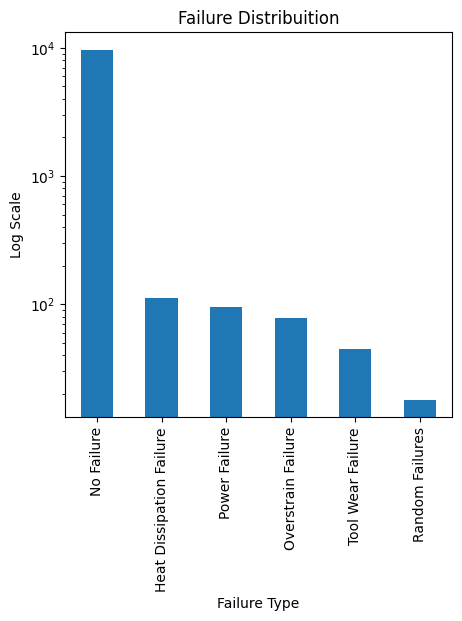

In [7]:
dataframe.failure_type.value_counts().plot(kind='bar', ylabel="Log Scale", xlabel="Failure Type", figsize=(5, 5), title="Failure Distribuition", logy=True)

In [11]:
failure_dist = dataframe["failed"].value_counts()
drop_set = dataframe.drop(["failed"], axis=1)

### Random UnderSampling $\to$ Reduce the majority class to equal the proportions

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling
rus = RandomUnderSampler(sampling_strategy="not minority")
drop_set.value_counts()
x_res, y_res = rus.fit_resample(X=drop_set, y= failure_dist)

ax = x_res.value_counts().plot.pie(autopct='%1.1f%%', figsize=(10, 10), title='Failure Distribution')
y_res.value_counts()
x_res.value_counts()

# Over_Sampling $\to$ Smote